# Cluster sur Hashtags

In [1]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

In [3]:
# Chargement des données
data = pd.read_csv("analyse_texte/cancer_sport_analyse.csv")
data2 = pd.read_csv("analyse_texte/cancer_fasting_analyse.csv")
data1 = pd.read_csv("analyse_texte/cancer_fasting_analyse.csv")


In [4]:
data3 = pd.concat([data,data1,data2])

In [5]:
data3

,Fichier,ID,Nb retweet,Nb like,Nb réponses,Nb citations,Hashtags,Texte,Mots,Phrases,Tags POS,Sentiment,Polarité,Subjectivité,Phrases nominales,Texte corrigé,Texte tokénizé
0,721916579533950976.json,721916579533950976,0,0,0,0,"['#CANCER', '#SPORT', '#PARENTING', '#SCHOOL',...",Is artificial turf giving athletes #cancer ? -...,"['Is', 'artificial', 'turf', 'giving', 'athlet...","[Sentence(""Is artificial turf giving athletes ...","[('Is', 'VBZ'), ('artificial', 'JJ'), ('turf',...","Sentiment(polarity=-0.6, subjectivity=1.0)",-0.600000,1.0000,"['artificial turf', 'athletes # cancer', 'spor...",Is artificial turf giving athletes #cancer ? -...,"['Is', 'artificial', 'turf', 'giving', 'athlet..."
1,238304774825603072.json,238304774825603072,0,1,0,0,"['#CANCER', '#SPORT']",Frankel's victory at York made me feel '20 yea...,"['Frankel', ""'s"", 'victory', 'at', 'York', 'ma...","[Sentence(""Frankel's victory at York made me f...","[('Frankel', 'NNP'), (""'s"", 'POS'), ('victory'...","Sentiment(polarity=0.5, subjectivity=0.5)",0.500000,0.5000,"['frankel', ""'s victory"", 'york', ""'20 years"",...",Fraenkel's victory at Work made me feel '20 ye...,"['Frankel', ""'s"", 'victory', 'at', 'York', 'ma..."
2,1007390700726575104.json,1007390700726575104,0,4,1,0,"['#SPORT', '#CANCER']",READ THIS! What an absolutely brilliant piece ...,"['READ', 'THIS', 'What', 'an', 'absolutely', '...","[Sentence(""READ THIS!""), Sentence(""What an abs...","[('READ', 'VB'), ('THIS', 'NN'), ('What', 'WP'...","Sentiment(polarity=0.5, subjectivity=0.5375)",0.500000,0.5375,"['read this', 'brilliant piece', '# sport trib...",READ THIS! That an absolutely brilliant piece ...,"['READ', 'THIS', '!', 'What', 'an', 'absolutel..."
3,668965073889697795.json,668965073889697795,0,0,0,0,"['#CANCER', '#STROKE', '#SPORT']","MJA InSight News: #Cancer survivors, exercise ...","['MJA', 'InSight', 'News', 'Cancer', 'survivor...","[Sentence(""MJA InSight News: #Cancer survivors...","[('MJA', 'NNP'), ('InSight', 'NNP'), ('News', ...","Sentiment(polarity=0.0, subjectivity=0.0)",0.000000,0.0000,"['mja insight', '# cancer survivors', 'atopic ...","MJA night News: #Cancer survivor, exercise bar...","['MJA', 'InSight', 'News', ':', '#', 'Cancer',..."
4,1098650711049555968.json,1098650711049555968,2,1,0,0,"['#HEALTH', '#CANCER', '#SPORT']",When #health #cancer &amp; #sport are inextric...,"['When', 'health', 'cancer', 'amp', 'sport', '...","[Sentence(""When #health #cancer &amp; #sport a...","[('When', 'WRB'), ('health', 'NN'), ('cancer',...","Sentiment(polarity=0.6000000000000001, subject...",0.600000,0.9000,"['# health # cancer', '# sport', 'amazing', 'd...",When #health #cancer &amp; #sport are inextric...,"['When', '#', 'health', '#', 'cancer', '&', 'a..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1030,600722228364214272.json,600722228364214272,0,0,0,0,"['#FASTING', '#DIET', '#CANCER']",Try this - a mental fast from fearful what-if ...,"['Try', 'this', 'a', 'mental', 'fast', 'from',...","[Sentence(""Try this - a mental fast from fearf...","[('Try', 'VB'), ('this', 'DT'), ('a', 'DT'), (...","Sentiment(polarity=-0.26666666666666666, subje...",-0.266667,0.6000,"['try', 'fearful what-if scenarios https', '//...",Cry this - a mental fast from fearful what-if ...,"['Try', 'this', '-', 'a', 'mental', 'fast', 'f..."
1031,934150883729924096.json,934150883729924096,2,2,0,1,"['#FASTING', '#FIGHT', '#CANCER', '#BOOST', '#...",Use Intermittent #Fasting to #Fight #Cancer (#...,"['Use', 'Intermittent', 'Fasting', 'to', 'Figh...","[Sentence(""Use Intermittent #Fasting to #Fight...","[('Use', 'NNP'), ('Intermittent', 'NNP'), ('Fa...","Sentiment(polarity=0.0, subjectivity=0.0)",0.000000,0.0000,"['intermittent', 'fasting', 'fight', '# cancer...",Use Intermittent #Wasting to #Right #Cancer (#...,"['Use', 'Intermittent', '#', 'Fasting', 'to', ..."
1032,923279388711510017.json,923279388711510017,0,0,0,0,"['#CANCER', '#FASTING', '#DIET']",#Cancer treatments undergo a rethink as #f

In [6]:
# Transformer les hashtags en chaînes de caractères
data3['Hashtags'] = data3['Hashtags'].astype(str)


In [7]:
# Vectorisation
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(data3['Hashtags'])

In [8]:
# Clustering
num_clusters = 10  # Ajustez ce nombre selon vos besoins
kmeans = KMeans(n_clusters=num_clusters, random_state=0).fit(X)

/Users/aaudric/miniconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [9]:
# Résultats du clustering
clusters = kmeans.labels_
data3['Cluster'] = clusters

In [10]:
# Compter la fréquence des hashtags dans chaque cluster
hashtag_frequencies = {}
for _, row in data3.iterrows():
    cluster = row['Cluster']
    hashtags = row['Hashtags'].split()  # Assurez-vous que les hashtags sont séparés par des espaces
    for hashtag in hashtags:
        if cluster not in hashtag_frequencies:
            hashtag_frequencies[cluster] = {}
        hashtag_frequencies[cluster][hashtag] = hashtag_frequencies[cluster].get(hashtag, 0) + 1

In [11]:
# Identifier les 3 hashtags les plus fréquents pour chaque cluster
top_hashtags = {}
for cluster, hashtags in hashtag_frequencies.items():
    # Trier les hashtags par fréquence en ordre décroissant et prendre les trois premiers
    top_3_hashtags = sorted(hashtags, key=hashtags.get, reverse=True)[:3]
    top_hashtags[cluster] = top_3_hashtags

In [12]:
# Fonction pour nettoyer les hashtags
def clean_hashtag(hashtag):
    return hashtag.replace("'", "").replace(",", "").replace("[", "").replace("]", "")

# Appliquer la fonction de nettoyage et transformer la liste en chaîne de caractères
for cluster in top_hashtags:
    top_hashtags[cluster] = ", ".join(map(clean_hashtag, top_hashtags[cluster]))

In [13]:
# Remplacer le numéro du cluster par les 3 hashtags les plus fréquents dans le DataFrame
data3['Top_3_Hashtags'] = data3['Cluster'].apply(lambda x: top_hashtags[x])

# Afficher le DataFrame mis à jour
print(data3[['Hashtags', 'Top_3_Hashtags']])


                                               Hashtags  \
0     ['#CANCER', '#SPORT', '#PARENTING', '#SCHOOL',...   
1                                 ['#CANCER', '#SPORT']   
2                                 ['#SPORT', '#CANCER']   
3                      ['#CANCER', '#STROKE', '#SPORT']   
4                      ['#HEALTH', '#CANCER', '#SPORT']   
...                                                 ...   
1030                   ['#FASTING', '#DIET', '#CANCER']   
1031  ['#FASTING', '#FIGHT', '#CANCER', '#BOOST', '#...   
1032                   ['#CANCER', '#FASTING', '#DIET']   
1033  ['#EXPOSOME', '#AGING', '#FASTING', '#FASTMIMI...   
1034  ['#NATURALEHEALING', '#HEALTHYFOOD', '#SHIPPIN...   

                       Top_3_Hashtags  
0         #CANCER, #FASTING, #FASTING  
1         #CANCER, #FASTING, #FASTING  
2         #CANCER, #FASTING, #FASTING  
3         #CANCER, #FASTING, #FASTING  
4         #CANCER, #FASTING, #FASTING  
...                               ...  
1030       

In [14]:
data3

,Fichier,ID,Nb retweet,Nb like,Nb réponses,Nb citations,Hashtags,Texte,Mots,Phrases,Tags POS,Sentiment,Polarité,Subjectivité,Phrases nominales,Texte corrigé,Texte tokénizé,Cluster,Top_3_Hashtags
0,721916579533950976.json,721916579533950976,0,0,0,0,"['#CANCER', '#SPORT', '#PARENTING', '#SCHOOL',...",Is artificial turf giving athletes #cancer ? -...,"['Is', 'artificial', 'turf', 'giving', 'athlet...","[Sentence(""Is artificial turf giving athletes ...","[('Is', 'VBZ'), ('artificial', 'JJ'), ('turf',...","Sentiment(polarity=-0.6, subjectivity=1.0)",-0.600000,1.0000,"['artificial turf', 'athletes # cancer', 'spor...",Is artificial turf giving athletes #cancer ? -...,"['Is', 'artificial', 'turf', 'giving', 'athlet...",1,"#CANCER, #FASTING, #FASTING"
1,238304774825603072.json,238304774825603072,0,1,0,0,"['#CANCER', '#SPORT']",Frankel's victory at York made me feel '20 yea...,"['Frankel', ""'s"", 'victory', 'at', 'York', 'ma...","[Sentence(""Frankel's victory at York made me f...","[('Frankel', 'NNP'), (""'s"", 'POS'), ('victory'...","Sentiment(polarity=0.5, subjectivity=0.5)",0.500000,0.5000,"['frankel', ""'s victory"", 'york', ""'20 years"",...",Fraenkel's victory at Work made me feel '20 ye...,"['Frankel', ""'s"", 'victory', 'at', 'York', 'ma...",1,"#CANCER, #FASTING, #FASTING"
2,1007390700726575104.json,1007390700726575104,0,4,1,0,"['#SPORT', '#CANCER']",READ THIS! What an absolutely brilliant piece ...,"['READ', 'THIS', 'What', 'an', 'absolutely', '...","[Sentence(""READ THIS!""), Sentence(""What an abs...","[('READ', 'VB'), ('THIS', 'NN'), ('What', 'WP'...","Sentiment(polarity=0.5, subjectivity=0.5375)",0.500000,0.5375,"['read this', 'brilliant piece', '# sport trib...",READ THIS! That an absolutely brilliant piece ...,"['READ', 'THIS', '!', 'What', 'an', 'absolutel...",1,"#CANCER, #FASTING, #FASTING"
3,668965073889697795.json,668965073889697795,0,0,0,0,"['#CANCER', '#STROKE', '#SPORT']","MJA InSight News: #Cancer survivors, exercise ...","['MJA', 'InSight', 'News', 'Cancer', 'survivor...","[Sentence(""MJA InSight News: #Cancer survivors...","[('MJA', 'NNP'), ('InSight', 'NNP'), ('News', ...","Sentiment(polarity=0.0, subjectivity=0.0)",0.000000,0.0000,"['mja insight', '# cancer survivors', 'atopic ...","MJA night News: #Cancer survivor, exercise bar...","['MJA', 'InSight', 'News', ':', '#', 'Cancer',...",1,"#CANCER, #FASTING, #FASTING"
4,1098650711049555968.json,1098650711049555968,2,1,0,0,"['#HEALTH', '#CANCER', '#SPORT']",When #health #cancer &amp; #sport are inextric...,"['When', 'health', 'cancer', 'amp', 'sport', '...","[Sentence(""When #health #cancer &amp; #sport a...","[('When', 'WRB'), ('health', 'NN'), ('cancer',...","Sentiment(polarity=0.6000000000000001, subject...",0.600000,0.9000,"['# health # cancer', '# sport', 'amazing', 'd...",When #health #cancer &amp; #sport are inextric...,"['When', '#', 'health', '#', 'cancer', '&', 'a...",1,"#CANCER, #FASTING, #FASTING"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1030,600722228364214272.json,600722228364214272,0,0,0,0,"['#FASTING', '#DIET', '#CANCER']",Try this - a mental fast from fearful what-if ...,"['Try', 'this', 'a', 'mental', 'fast', 'from',...","[Sentence(""Try this - a mental fast from fearf...","[('Try', 'VB'), ('this', 'DT'), ('a', 'DT'), (...","Sentiment(polarity=-0.26666666666666666, subje...",-0.266667,0.6000,"['try', 'fearful what-if scenarios https', '//...",Cry this - a mental fast from fearful what-if ...,"['Try', 'this', '-', 'a', 'mental', 'fast', 'f...",9,"#CANCER, #DIET, #FASTING"
1031,934150883729924096.json,934150883729924096,2,2,0,1,"['#FASTING', '#FIGHT', '#CANCER', '#BOOST', '#...",Use Intermittent #Fasting to #Fight #Cancer (#...,"['Use', 'Intermittent', 'Fasting', 'to', 'Figh...","[Sentence(""Use Intermittent #Fasting to #Fight...","[('Use', 'NNP'), ('Intermittent', 'NNP'), ('Fa...","Sentiment(polarity=0.0, subjectivity=0.0)",0.000000,0.0000,"['intermittent', 'fasting', 'fight', '# cancer...",Use Intermitten

In [15]:
data3[["Cluster","Top_3_Hashtags"]].value_counts()

Cluster  Top_3_Hashtags                         
1        #CANCER, #FASTING, #FASTING                1583
3        #FASTING, #CANCER, #CANCER                  270
9        #CANCER, #DIET, #FASTING                    246
7        #CANCER, #CHEMOTHERAPY, #FASTING            129
5        #CANCER, #INTERMITTENTFASTING, #FASTING     116
8        #WORLDWIDE, #CANCER, #CARRIBEAN              74
6        #CANCER, #EXERCISE, #SPORT                   71
4        #FASTINGSUMMIT, #FASTING, #CANCER            64
0        #DIET, #KETOSIS, #FASTING                    60
2        #ESSENTIALOILS, #HOMEOPATHY, #DETOX          48
Name: count, dtype: int64

## Graphe co-occurence

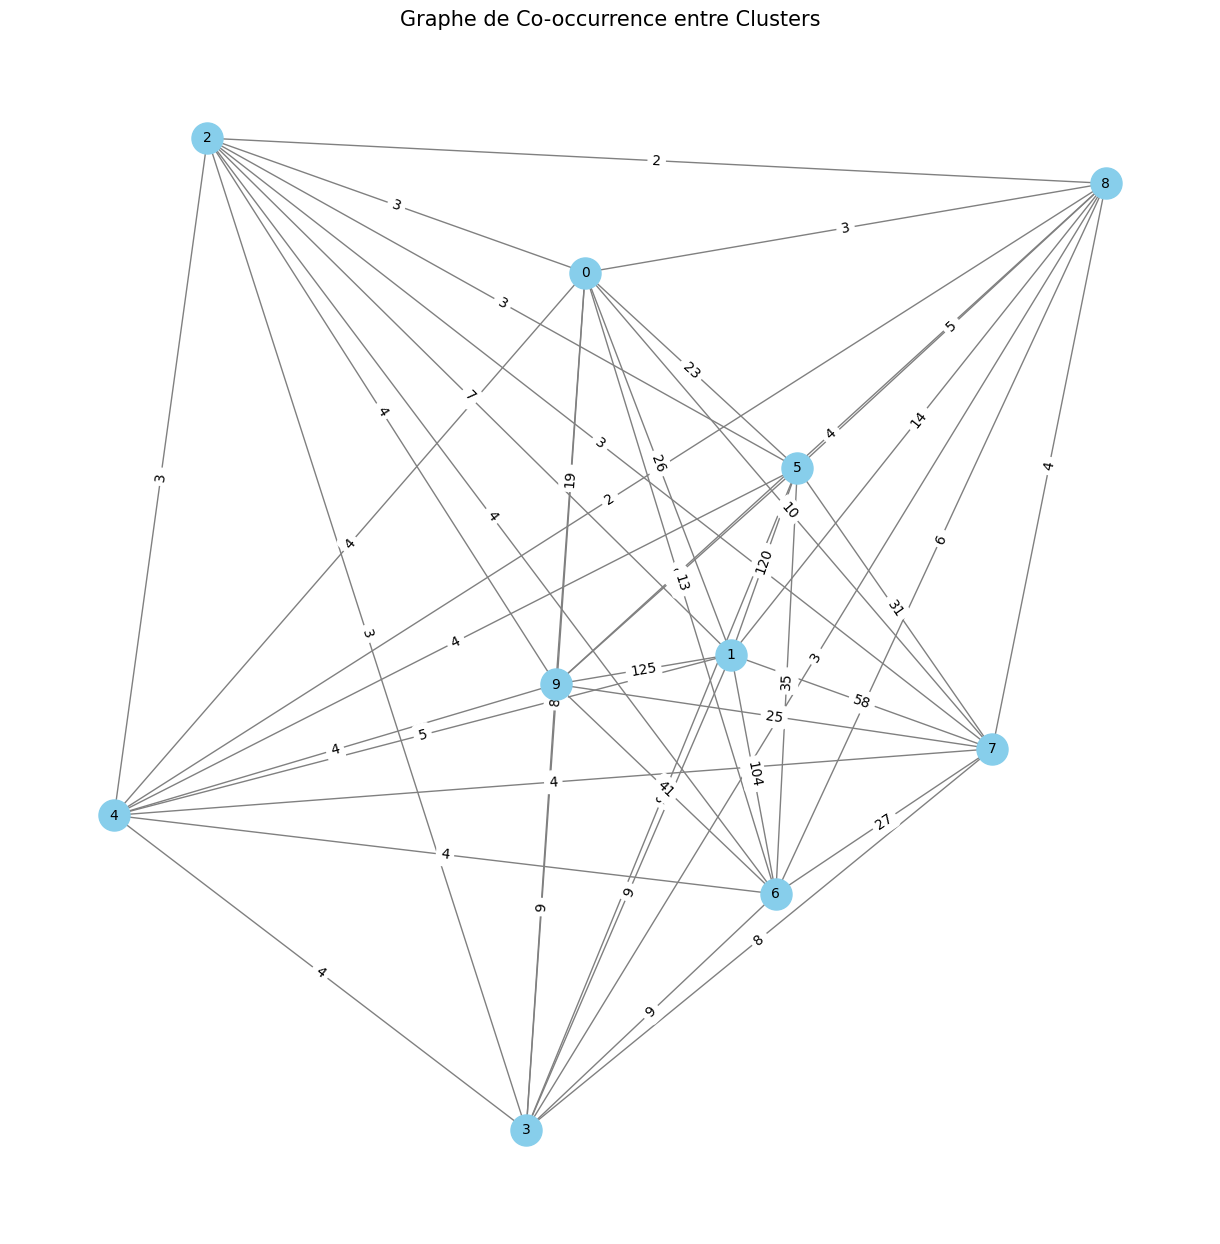

In [16]:
import networkx as nx
import matplotlib.pyplot as plt
from itertools import combinations

# Création d'un graphe vide
C = nx.Graph()

# Créer une liste de hashtags par cluster
hashtags_by_cluster = {}
for _, row in data3.iterrows():
    cluster = row['Cluster']
    hashtags = row['Hashtags'].split()  # Assurez-vous de séparer les hashtags par des espaces
    if cluster not in hashtags_by_cluster:
        hashtags_by_cluster[cluster] = set()
    hashtags_by_cluster[cluster].update(hashtags)

# Identifier les co-occurrences entre clusters
co_occurrence_clusters = {}
for cluster1, hashtags1 in hashtags_by_cluster.items():
    for cluster2, hashtags2 in hashtags_by_cluster.items():
        if cluster1 != cluster2:
            common_hashtags = hashtags1.intersection(hashtags2)
            if common_hashtags:
                co_occurrence_clusters[(cluster1, cluster2)] = len(common_hashtags)

# Ajout des nœuds et des arêtes au graphe
for (cluster1, cluster2), weight in co_occurrence_clusters.items():
    C.add_edge(cluster1, cluster2, weight=weight)

# Visualisation du graphe
plt.figure(figsize=(12, 12))
pos = nx.spring_layout(C)  # Positionnement des nœuds
nx.draw(C, pos, with_labels=True, node_size=500, node_color='skyblue', font_size=10, edge_color='gray')
edge_labels = nx.get_edge_attributes(C, 'weight')
nx.draw_networkx_edge_labels(C, pos, edge_labels=edge_labels)
plt.title("Graphe de Co-occurrence entre Clusters", size=15)
plt.show()


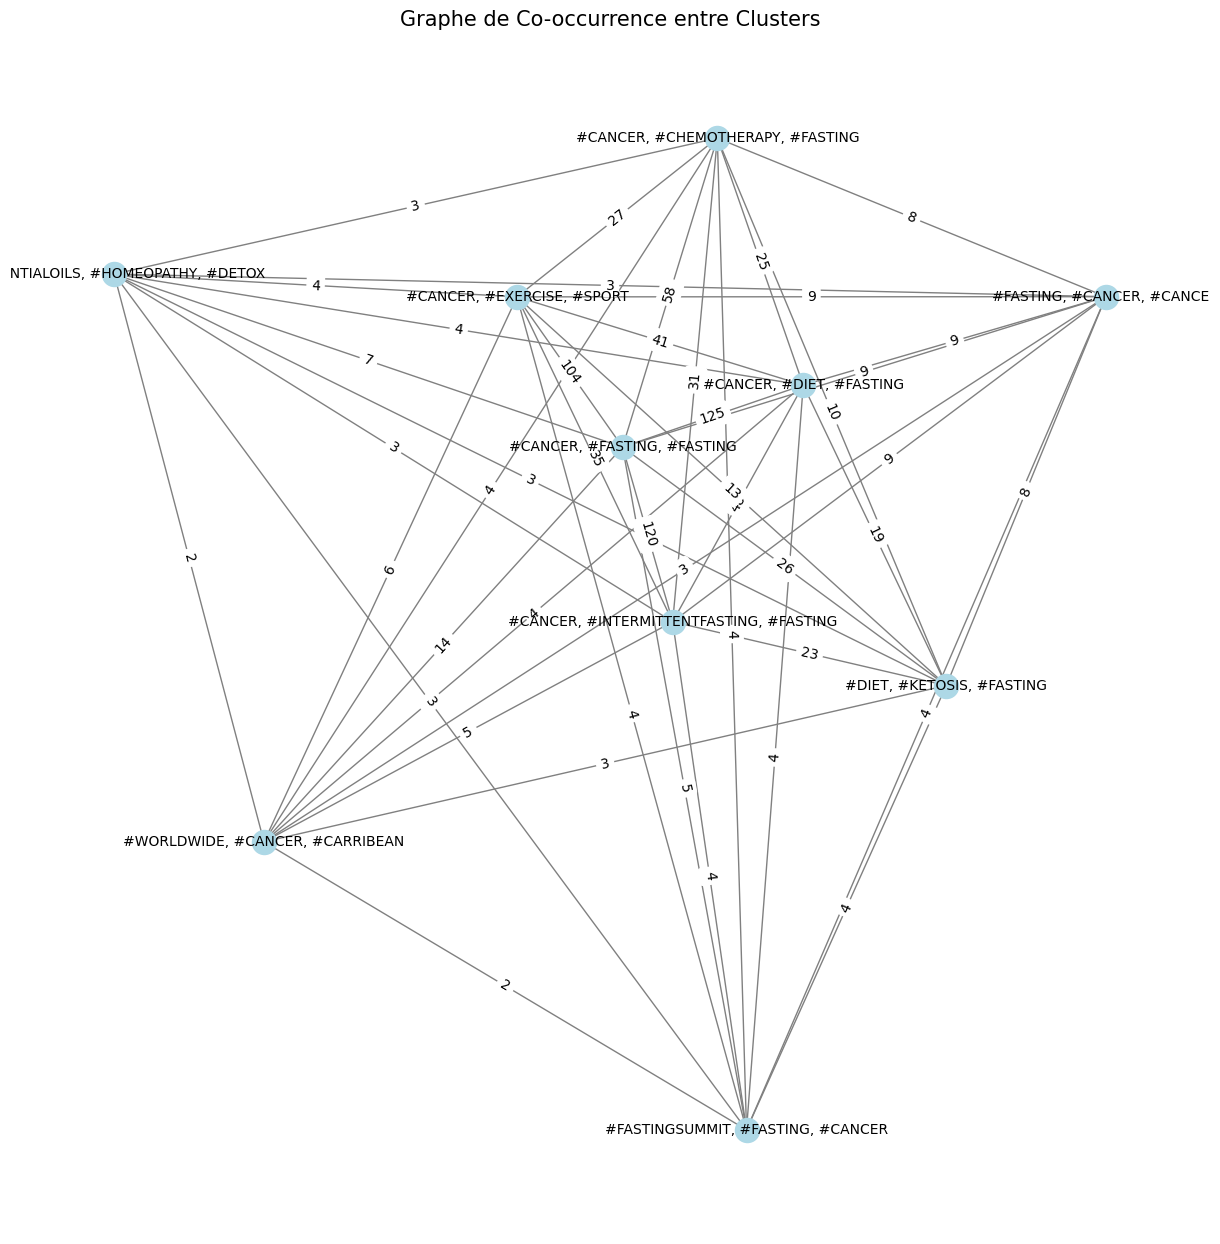

In [17]:
import networkx as nx
import matplotlib.pyplot as plt
from itertools import combinations

# Création d'un graphe vide
C = nx.Graph()

# Créer une liste de hashtags par cluster
hashtags_by_cluster = {}
for _, row in data3.iterrows():
    cluster = row['Cluster']
    hashtags = row['Hashtags'].split()  # Assurez-vous de séparer les hashtags par des espaces
    if cluster not in hashtags_by_cluster:
        hashtags_by_cluster[cluster] = set()
    hashtags_by_cluster[cluster].update(hashtags)

# Identifier les co-occurrences entre clusters
co_occurrence_clusters = {}
for cluster1, hashtags1 in hashtags_by_cluster.items():
    for cluster2, hashtags2 in hashtags_by_cluster.items():
        if cluster1 != cluster2:
            common_hashtags = hashtags1.intersection(hashtags2)
            if common_hashtags:
                co_occurrence_clusters[(cluster1, cluster2)] = len(common_hashtags)


# Ajout des nœuds et des arêtes au graphe
for (cluster1, cluster2), weight in co_occurrence_clusters.items():
    hashtag1 = top_hashtags[cluster1]
    hashtag2 = top_hashtags[cluster2]
    C.add_edge(hashtag1, hashtag2, weight=weight)

# Visualisation du graphe
plt.figure(figsize=(12, 12))
pos = nx.spring_layout(C, k=1.5)  # k régule la distance entre les nœuds
nx.draw(C, pos, with_labels=True, node_color='lightblue', edge_color='gray', font_size=10)
edge_labels = nx.get_edge_attributes(C, 'weight')
nx.draw_networkx_edge_labels(C, pos, edge_labels=edge_labels)
plt.title("Graphe de Co-occurrence entre Clusters", size=15)
plt.show()


## Graphe détection communauté

/var/folders/q7/05h3nfts6n3_246h_khmw2z00000gn/T/ipykernel_55334/1335230689.py:13: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('Set3', max(partition.values()) + 1)


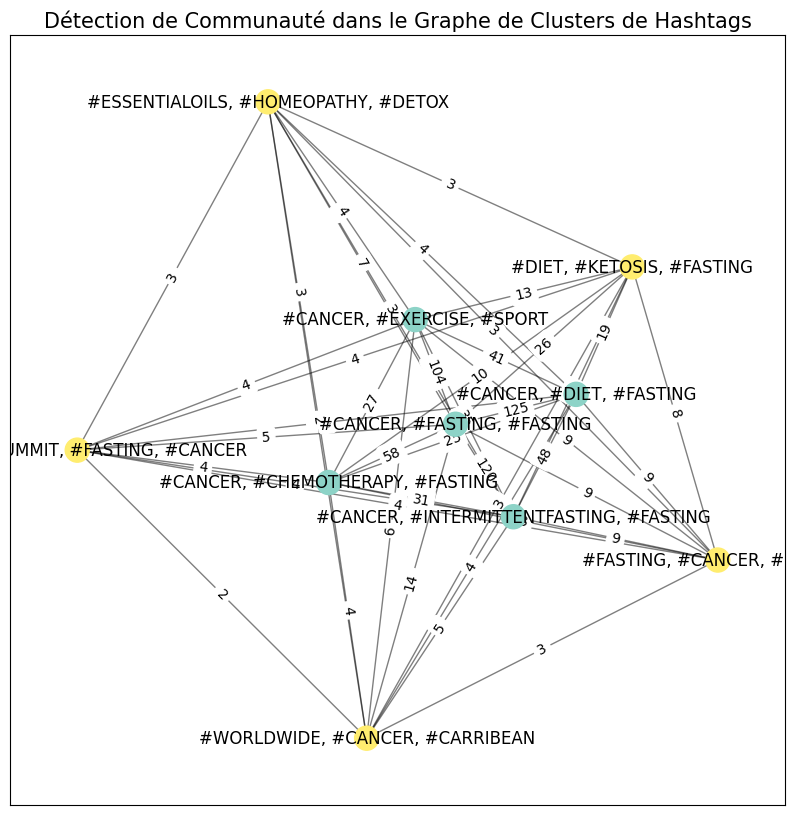

In [18]:
import networkx as nx
import matplotlib.pyplot as plt
import community as community_louvain

# Détection de communauté avec l'algorithme de Louvain
partition = community_louvain.best_partition(C)

# Visualisation
plt.figure(figsize=(10, 10))
pos = nx.spring_layout(C, k=1.5)

# Coloration des nœuds en fonction de leur partition
cmap = plt.cm.get_cmap('Set3', max(partition.values()) + 1)
nx.draw_networkx_nodes(C, pos, partition.keys(), cmap=cmap, node_color=list(partition.values()))
nx.draw_networkx_edges(C, pos, alpha=0.5)
edge_labels = nx.get_edge_attributes(C, 'weight')
nx.draw_networkx_edge_labels(C, pos, edge_labels=edge_labels)
nx.draw_networkx_labels(C, pos)

plt.title("Détection de Communauté dans le Graphe de Clusters de Hashtags", size=15)
plt.show()


In [21]:
from pyvis.network import Network
import community as community_louvain
import matplotlib.colors as mcolors

# Détection de communauté avec l'algorithme de Louvain
partition = community_louvain.best_partition(C)

# Création d'un objet Network de pyvis
net = Network(notebook=True, width="100%", height="750px", bgcolor="#222222", font_color="white")

# Positionnement des nœuds
pos = nx.spring_layout(C, k=1.5)

# Coloration des nœuds en fonction de leur partition
cmap = plt.cm.get_cmap('Set3', max(partition.values()) + 1)

# Ajout des nœuds et des arêtes de NetworkX à pyvis
for node in C.nodes:
    net.add_node(node, label=str(node), color=mcolors.rgb2hex(cmap(partition[node])))

# Supposons que 'edge_labels' est un dictionnaire avec des clés étant des tuples (source, cible) 
# et des valeurs étant les poids des arêtes.

for (cluster1, cluster2), weight in edge_labels.items():
    net.add_edge(cluster1, cluster2, value=weight, title=str(weight))


# Paramètres de visualisation

net.show_buttons(filter_=['physics'])

# Afficher le graphe
net.show("community_detection_graph.html")


community_detection_graph.html


/var/folders/q7/05h3nfts6n3_246h_khmw2z00000gn/T/ipykernel_55334/1722973429.py:15: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('Set3', max(partition.values()) + 1)


In [26]:
import networkx as nx
import community as community_louvain
from pyvis.network import Network
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Créer un objet Network de pyvis
net = Network(notebook=True, cdn_resources='remote',select_menu=True,width="100%",filter_menu=True)

# Positionnement des nœuds
pos = nx.spring_layout(C, k=1.5)

# Coloration des nœuds en fonction de leur partition
cmap = plt.cm.get_cmap('Set3', max(partition.values()) + 1)
# Ajout des nœuds et des arêtes de NetworkX à pyvis
for node in C.nodes:
    net.add_node(node, label=node, color=mcolors.rgb2hex(cmap(partition[node])))


for (cluster1, cluster2), weight in edge_labels.items():
    net.add_edge(cluster1, cluster2, value=weight, title=str(weight))
# Paramètres de visualisation

net.toggle_physics(True)

# Affichage du graphe
net.from_nx(C)
net.show_buttons(filter_=['physics'])

# Afficher le graphique pyvis
net.show("graph/community_detection_inm_cluster.html")


graph/community_detection_inm_cluster.html


/var/folders/q7/05h3nfts6n3_246h_khmw2z00000gn/T/ipykernel_55334/383988836.py:14: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('Set3', max(partition.values()) + 1)
